In [1]:
# Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pvlib
from pvlib.location import Location

In [7]:
# Definition of Location oject. Coordinates and elevation of Madrid Ciemat Headquarters (Spain)
site = Location(40.456, -3.73, 'Etc/GMT+1', 651, 'Ciemat (Madrid, ES)') # latitude, longitude, time_zone, altitude, name

# Definition of a time range of simulation
times = pd.date_range('2018-01-01 00:00:00', '2018-12-31 23:59:00', closed='left', freq='H', tz=site.tz)

# Estimate Solar Position with the 'Location' object
solpos = site.get_solarposition(times)

# Visualize the resulting DataFrame
solpos.head()

TypeError: DatetimeArray._generate_range() got an unexpected keyword argument 'closed'

In [5]:
pip install --upgrade pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 8.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
Note: you may need to restart the kernel to use updated packages.


In [9]:
from pvlib.location import Location
import pandas as pd

# Define Location
site = Location(40.456, -3.73, 'Europe/Madrid', 651, 'Ciemat (Madrid, ES)')

# Define hourly time range for 2018 (corrected: no 'closed' parameter)
times = pd.date_range('2018-01-01 00:00:00', '2018-12-31 23:00:00', freq='H', tz=site.tz)

# Compute solar position
solpos = site.get_solarposition(times)

# View the first few rows
print(solpos.head())

                           apparent_zenith      zenith  apparent_elevation  \
2018-01-01 00:00:00+01:00       156.017391  156.017391          -66.017391   
2018-01-01 01:00:00+01:00       162.144423  162.144423          -72.144423   
2018-01-01 02:00:00+01:00       160.468395  160.468395          -70.468395   
2018-01-01 03:00:00+01:00       152.396698  152.396698          -62.396698   
2018-01-01 04:00:00+01:00       141.889229  141.889229          -51.889229   

                           elevation     azimuth  equation_of_time  
2018-01-01 00:00:00+01:00 -66.017391  310.715586         -3.306804  
2018-01-01 01:00:00+01:00 -72.144423  346.186529         -3.326452  
2018-01-01 02:00:00+01:00 -70.468395   29.900075         -3.346090  
2018-01-01 03:00:00+01:00 -62.396698   58.528284         -3.365720  
2018-01-01 04:00:00+01:00 -51.889229   75.239601         -3.385340  


/var/folders/4p/c34kjspx0053g43j2_b5w2z40000gn/T/ipykernel_11334/3041247717.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  times = pd.date_range('2018-01-01 00:00:00', '2018-12-31 23:00:00', freq='H', tz=site.tz)


In [11]:
# Alternative method using the 'solarposition.get_solarposition' function
solpos = pvlib.solarposition.get_solarposition(times, site.latitude, site.longitude, site.altitude)

solpos.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2018-01-01 00:00:00+01:00,156.017391,156.017391,-66.017391,-66.017391,310.715586,-3.306804
2018-01-01 01:00:00+01:00,162.144423,162.144423,-72.144423,-72.144423,346.186529,-3.326452
2018-01-01 02:00:00+01:00,160.468395,160.468395,-70.468395,-70.468395,29.900075,-3.346090
2018-01-01 03:00:00+01:00,152.396698,152.396698,-62.396698,-62.396698,58.528284,-3.365720
2018-01-01 04:00:00+01:00,141.889229,141.889229,-51.889229,-51.889229,75.239601,-3.385340


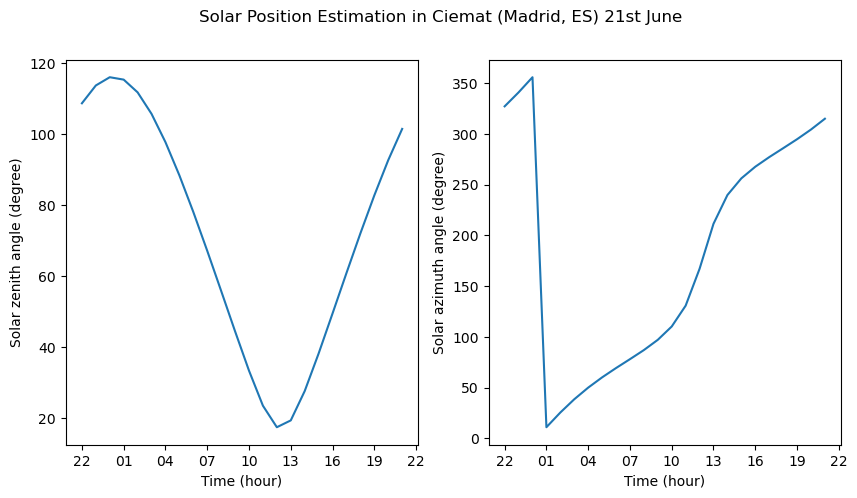

In [13]:
import matplotlib.dates as mdates

# Plots for solar zenith and solar azimuth angles
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Solar Position Estimation in ' + site.name + ' 21st June')

# plot for solar zenith angle
ax1.plot(solpos.loc['2018-06-21'].zenith)
ax1.set_ylabel('Solar zenith angle (degree)')
ax1.set_xlabel('Time (hour)')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H'))

# plot for solar azimuth angle
ax2.plot(solpos.loc['2018-06-21'].azimuth)
ax2.set_ylabel('Solar azimuth angle (degree)')
ax2.set_xlabel('Time (hour)')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H'))

In [15]:
# Estimate the solar position with a specific SPA defined with the argument 'method' 
solpos_nrel = pvlib.solarposition.get_solarposition(times, site.latitude, site.longitude, site.altitude, method='nrel_numpy')
solpos_pyephem = pvlib.solarposition.get_solarposition(times, site.latitude, site.longitude, site.altitude, method='pyephem')
solpos_ephemeris = pvlib.solarposition.get_solarposition(times, site.latitude, site.longitude, site.altitude, method='ephemeris')

ImportError: PyEphem must be installed

In [17]:
pip install ephem

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [19]:
# Estimate the solar position with a specific SPA defined with the argument 'method' 
solpos_nrel = pvlib.solarposition.get_solarposition(times, site.latitude, site.longitude, site.altitude, method='nrel_numpy')
solpos_pyephem = pvlib.solarposition.get_solarposition(times, site.latitude, site.longitude, site.altitude, method='pyephem')
solpos_ephemeris = pvlib.solarposition.get_solarposition(times, site.latitude, site.longitude, site.altitude, method='ephemeris')

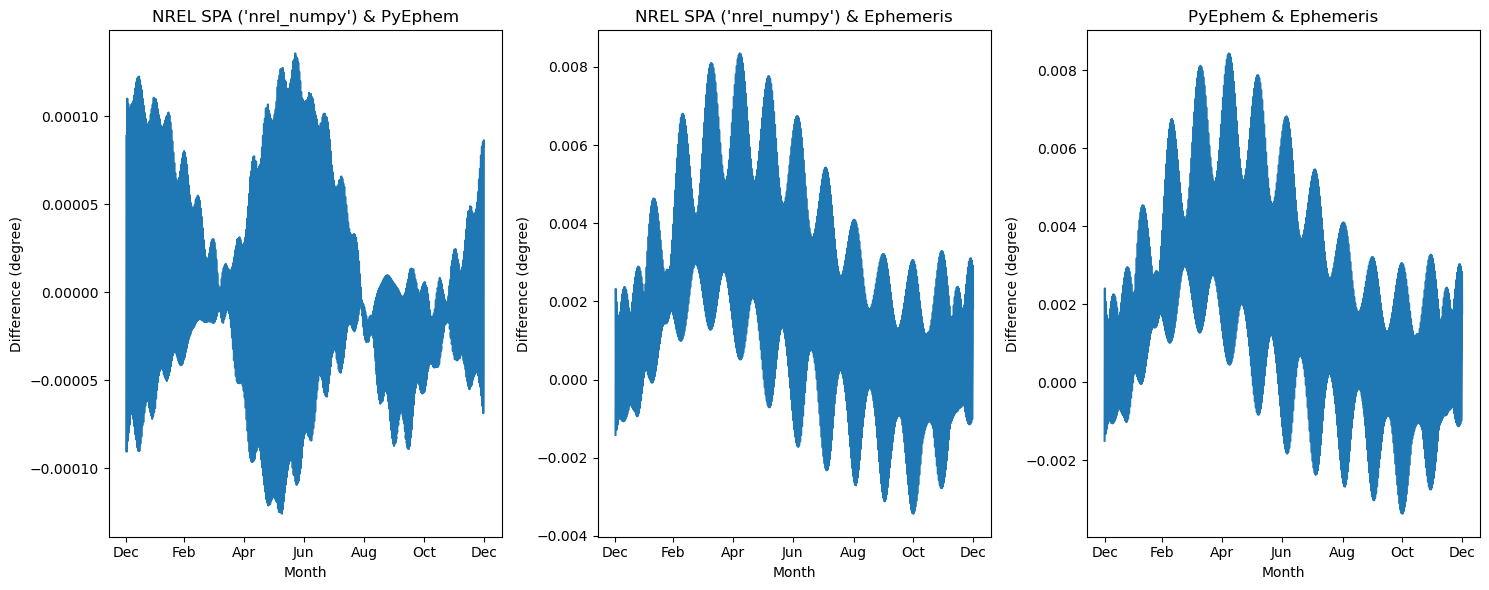

In [21]:
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

# Wrap the axes
axs = axs.ravel()

# Plot
axs[0].plot(solpos_nrel['zenith']-solpos_pyephem['zenith'])
axs[1].plot(solpos_nrel['zenith']-solpos_ephemeris['zenith'])
axs[2].plot(solpos_pyephem['zenith']-solpos_ephemeris['zenith'])

# Add characteristics to each subplot in a loop
plots = ["NREL SPA ('nrel_numpy') & PyEphem", "NREL SPA ('nrel_numpy') & Ephemeris", "PyEphem & Ephemeris"]
for i in range(3):
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Difference (degree)')
    axs[i].set_title(plots[i])
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()

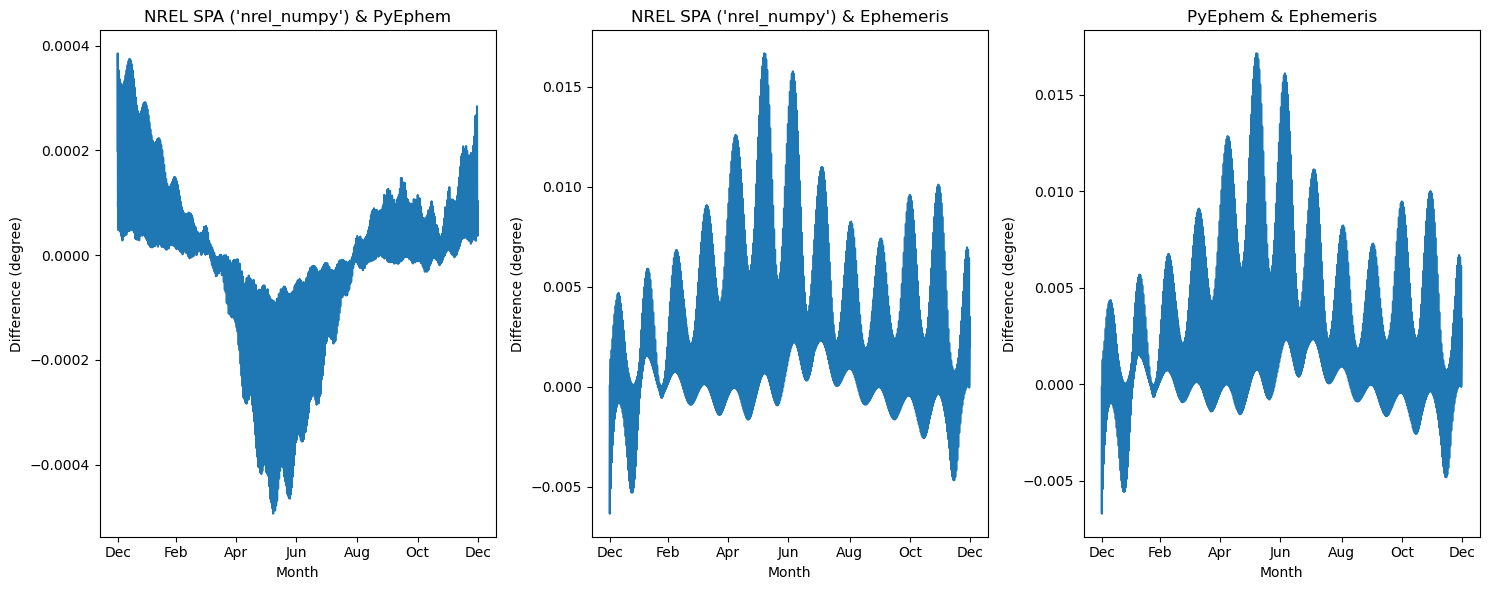

In [23]:
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

# Wrap the axes
axs = axs.ravel()

# Plot
axs[0].plot(solpos_nrel['azimuth']-solpos_pyephem['azimuth'])
axs[1].plot(solpos_nrel['azimuth']-solpos_ephemeris['azimuth'])
axs[2].plot(solpos_pyephem['azimuth']-solpos_ephemeris['azimuth'])

# Add characteristics to each subplot in a loop
plots = ["NREL SPA ('nrel_numpy') & PyEphem", "NREL SPA ('nrel_numpy') & Ephemeris", "PyEphem & Ephemeris"]
for i in range(3):
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Difference (degree)')
    axs[i].set_title(plots[i])
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()

In [25]:
# compute the absolute difference in Solar Zenith Angle between SPA methods
nrel_pyephem = np.abs(solpos_nrel['zenith']-solpos_pyephem['zenith']).max()
nrel_ephemeris = np.abs(solpos_nrel['zenith']-solpos_ephemeris['zenith']).max()
pyephem_ephemeris = np.abs(solpos_pyephem['zenith']-solpos_ephemeris['zenith']).max()

# list of variables 
spa_methods_sza = [nrel_pyephem, nrel_ephemeris, pyephem_ephemeris] # Solar Zenith Angle

# compute the absolute difference in Solar Zenith Angle between SPA methods
nrel_pyephem = np.abs(solpos_nrel['azimuth']-solpos_pyephem['azimuth']).max()
nrel_ephemeris = np.abs(solpos_nrel['azimuth']-solpos_ephemeris['azimuth']).max()
pyephem_ephemeris = np.abs(solpos_pyephem['azimuth']-solpos_ephemeris['azimuth']).max()

# list of variables 
spa_methods_azi = [nrel_pyephem, nrel_ephemeris, pyephem_ephemeris] # Solar Azimuth Angle

spa_names = ['NREL & PyEphem','NREL & Ephemeris','PyEphem & Ephemeris']

print("Absolute differences between solar position algorithms:\n" + "-"*55)
print("Solar Zenith Angle")
for i in range(len(spa_names)):
    print("-", spa_names[i], ": {:.5f}".format(spa_methods_sza[i]))

print("\nSolar Azimuth Angle")
for i in range(len(spa_names)):
    print("-", spa_names[i], ": {:.5f}".format(spa_methods_azi[i]))

Absolute differences between solar position algorithms:
-------------------------------------------------------
Solar Zenith Angle
- NREL & PyEphem : 0.00014
- NREL & Ephemeris : 0.00835
- PyEphem & Ephemeris : 0.00844

Solar Azimuth Angle
- NREL & PyEphem : 0.00049
- NREL & Ephemeris : 0.01666
- PyEphem & Ephemeris : 0.01715


In [27]:
#The solar analemma
# Definition of a times (noon)
times = pd.date_range('2020-01-01 12:00:00', '2021-01-01 12:00:00', closed='left', freq='W', tz='UTC')
# Solar Position Estimation for the object 'site' (CIEMAT, Madrid (Spain))
solpos = site.get_solarposition(times)

# Plotting the Analemma
plt.scatter(solpos['azimuth'], solpos['apparent_elevation'], marker="*", c=times.isocalendar().week, cmap='plasma')
cbar = plt.colorbar()
cbar.set_label('Week of Year')
plt.xlabel('Solar Azimuth Angle (degree)')
plt.ylabel('Solar Elevation Angle (degree)')
plt.title('Solar Analemma in ' + site.name + ' at noon (UTC)')
plt.grid()
plt.show()

TypeError: DatetimeArray._generate_range() got an unexpected keyword argument 'closed'

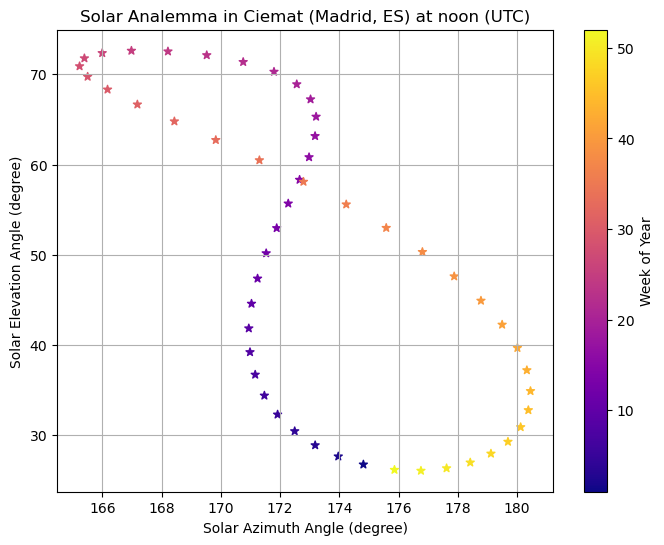

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from pvlib.location import Location

# Define location
site = Location(40.456, -3.73, 'Europe/Madrid', 651, 'Ciemat (Madrid, ES)')

# Define a time range: weekly at noon UTC (no 'closed' parameter)
times = pd.date_range('2020-01-01 12:00:00', '2021-01-01 12:00:00', freq='W', tz='UTC')

# Compute solar position at those times
solpos = site.get_solarposition(times)

# Plot the solar analemma
plt.figure(figsize=(8, 6))
plt.scatter(
    solpos['azimuth'],
    solpos['apparent_elevation'],
    marker="*",
    c=times.isocalendar().week,
    cmap='plasma'
)
cbar = plt.colorbar()
cbar.set_label('Week of Year')
plt.xlabel('Solar Azimuth Angle (degree)')
plt.ylabel('Solar Elevation Angle (degree)')
plt.title(f'Solar Analemma in {site.name} at noon (UTC)')
plt.grid(True)
plt.show()

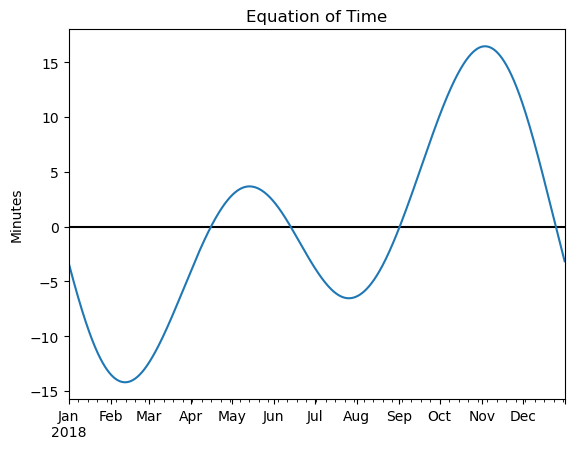

In [31]:
fig, ax1 = plt.subplots()
ax1 = solpos_nrel['equation_of_time'].plot(zorder=2)
ax1.hlines(0, solpos_nrel.index[0], solpos_nrel.index[-1], color='black', zorder=1)
ax1.set_ylabel('Minutes')
plt.title('Equation of Time')
plt.show()